## 특징별로 시각화(3)

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#pd.set_option('display.max_row', 500)

#### 3. 송신자 위조 여부 시각화
관련 헤더
- /header/header/mail_from: SMTP 트랜잭션 상의 MAIL FROM 명령에 전달되는 송신자
- /header/from: 보낸 사람의 메일 프로그램에 의해 삽입되는 송신자

<br> **메일은 대소문자 구분 안하나?** gmail에서 BJG3787@naver.com으로 보냈는데 내 메일(bjg378@naver.com)으로 메일 옴
<br> eml-parser에서 /header/header/form 값 파싱할 때 모두 소문자로 바꿔 가져오는 것으로 보임 

In [2]:
eml_df = pd.read_csv("../../parsed_eml_3.csv")

In [3]:
# 이전의 index값이 계속 쌓임, 일단 제거
del eml_df["Unnamed: 0"]
del eml_df["Unnamed: 0.1"]
del eml_df["Unnamed: 0.1.1"]

In [4]:
columns = ["/header/header/mail_from", "/header/from", "/header/header/from"]
eml_df[columns]

,/header/header/mail_from,/header/from,/header/header/from
0,jjfkjsfjk4514262@nate.com,jjfkjsfjk4514262@nate.com,jjfkjsfjk4514262@nate.com
1,yenjuy@outlook.kr,yenjuy@outlook.kr,翬 <yenjuy@outlook.kr>
2,hjas91546@naver.com,hjas91546@naver.com,躸 <hjas91546@naver.com>
3,augusta_precious_metals-april411=smmobi.com@t...,augusta_precious_metals@thgmj.work,Augusta Precious Metals <augusta_precious_met...
4,EugeneSpencero@etb.net.co,eugenespencero@etb.net.co,Jaelyn <EugeneSpencero@etb.net.co>
...,...,...,...
150,ThomasJohnson@toddhammondscpa.com,thomasjohnson@toddhammondscpa.com,Daleyza <ThomasJohnson@toddhammondscpa.com>
151,shinhoan@outlook.kr,shinhoan@outlook.kr,Ƚȣ <shinhoan@outlook.kr>
152,yenjuy@outlook.kr,yenjuy@outlook.kr,翬 <yenjuy@outlook.kr>
153,shinhoan@outlook.kr,shinhoan@outlook.kr,Ƚȣ <shinhoan@outlook.kr>


In [5]:
eml_df["mail_from"] = eml_df["/header/header/mail_from"].str.strip().str.lower()
eml_df["from_"] = eml_df["/header/from"].str.strip().str.lower()
same = eml_df.mail_from == eml_df.from_

In [6]:
eml_df.loc[same, "is_forgery"] = 'X'
eml_df.loc[~same, "is_forgery"] = 'O'

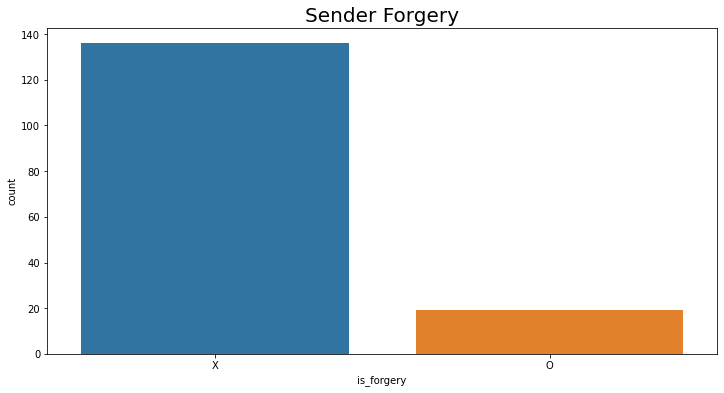

In [8]:
# 송신자 위조 여부 시각화
plt.figure(figsize=(12,6))
plt.title('Sender Forgery', fontsize=20)
sns.countplot(x="is_forgery", data=eml_df)
plt.show()

In [10]:
# mail_from과 from 값이 다른 행들
eml_df.loc[~same, columns]

,/header/header/mail_from,/header/from,/header/header/from
3,augusta_precious_metals-april411=smmobi.com@t...,augusta_precious_metals@thgmj.work,Augusta Precious Metals <augusta_precious_met...
8,NaN,nana@aliceavilajoias.com.br,Atual Acessoria <nana@aliceavilajoias.com.br>
15,NaN,beii5056@white.kr,이광훈 <beii5056@white.kr>
23,business_internet_services-finalitydisenfranc...,business_internet_services@floertrz.rest,Business Internet Services <business_internet...
25,hatunemiku-cv0@twtr.jp,daoid-craftsperson7@msn.com,れいの <daoiD-craftsperson7@msn.com>
26,NaN,autoreports@shadowserver.org,autoreports@shadowserver.org
31,root@a49.mail-amcs014.com,subs1468@mail-amcs014.com,"""Americanas.com"" <subs1468@mail-amcs014.com>"
42,12178-19290-120007-3173-besame=citb.co.kr@mai...,youthfulhair@nutritions.best,Youthful hair <Youthfulhair@nutritions.best>
44,asae592mbh@nifty.com,shiori_zeri_6peritectic7@gmail.com,朋佳 <shiori_zeri_6peritectic7@gmail.com>
60,root@q1.janeladaalmaaberta.com,accountnetflix-account24537@q1.janeladaalmaabe...,"""Hum...Problemas na Sua Assinatura - ID 84773..."
